## Implementation of ELMo


## About the dataset 

2. Tweets from pages of different mobile companies 

Here’s a breakdown of the dataset we have:

The train set contains 7,920 tweets
The test set contains 1,953 tweets

In [1]:
#-------------------------------- Imports ------------------------


import pandas as pd
import numpy as np
import spacy
from tqdm import tqdm
import re
import time
import pickle
pd.set_option('display.max_colwidth', 200)
import seaborn as sns

In [2]:
train = pd.read_csv("data_for_elmo/train_2kmZucJ.csv")
test = pd.read_csv("data_for_elmo/test_oJQbWVk.csv")

In [3]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [4]:
train.shape, test.shape

((7920, 3), (1953, 2))

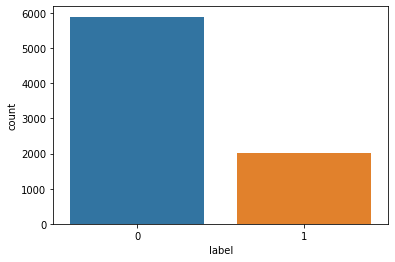

In [5]:
sns.countplot(train.label)

Here, 1 represents a negative tweet while 0 represents a non-negative tweet.

Let’s take a quick look at the first 5 rows in our train set:

In [6]:
train['label'].value_counts(normalize = True)


0    0.744192
1    0.255808
Name: label, dtype: float64

There seem to be quite a few URL links in the tweets. They are not telling us much (if anything) about the sentiment of the tweet so let’s remove them.

In [7]:
# remove URL's from train and test
train['clean_tweet'] = train['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

test['clean_tweet'] = test['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

We have used Regular Expressions (or RegEx) to remove the URLs.

Note: You can learn more about Regex in this article.

We’ll go ahead and do some routine text cleaning now.

In [8]:
punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~'

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
test['clean_tweet'] = test['clean_tweet'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))

# convert text to lowercase
train['clean_tweet'] = train['clean_tweet'].str.lower()
test['clean_tweet'] = test['clean_tweet'].str.lower()

# remove numbers
train['clean_tweet'] = train['clean_tweet'].str.replace("[0-9]", " ")
test['clean_tweet'] = test['clean_tweet'].str.replace("[0-9]", " ")

# remove whitespaces
train['clean_tweet'] = train['clean_tweet'].apply(lambda x:' '.join(x.split()))
test['clean_tweet'] = test['clean_tweet'].apply(lambda x: ' '.join(x.split()))

We will lemmatize (normalize) the text by leveraging the popular spaCy library.

In [10]:
# import spaCy's language model
nlp = spacy.load('en', disable=['parser', 'ner'])

# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

In [11]:
train['clean_tweet'] = lemmatization(train['clean_tweet'])
test['clean_tweet'] = lemmatization(test['clean_tweet'])

In [12]:
train.sample(10)

,id,label,tweet,clean_tweet
7125,7126,0,#bday to ME! Bought myself a new #backpack for my #camera #gear #microphone #sony #mylife… http://instagram.com/p/Y0RW_8MzJz/,bday to -PRON- buy -PRON- a new backpack for -PRON- camera gear microphone sony mylife …
333,334,0,"Photo: #iphonesia, #iphone, #instagood, #instagram, #photooftheday, #tweegram, , #iphoneonly, #igers,... http://tmblr.co/ZZ7XpxPqMwKt","photo iphonesia , iphone , instagood , instagram , photooftheday , tweegram , , iphoneonly , iger , ..."
840,841,0,Ok let's go #sony #z1 #paixaodecristo #rec #hdv #equipedelta #eita #aovivo #pacatuba #gravação… http://instagram.com/p/m-R4wsFyqK/,ok let -PRON- go sony z paixaodecristo rec hdv equipedelta eita aovivo pacatuba gravação …
4476,4477,0,Fim de boat!!!!!! #iphone #girl #valescapopozuda #now #nice @ Fenix Party http://instagram.com/p/c3i8KHnR1B/,fim de boat iphone girl valescapopozuda now nice fenix party
6802,6803,0,I'm so #wasted I almost drop my #iPhone 4!!! That would've made me #cry!! I know it sounds #pathetic but I just my,-PRON- be so waste i almost drop -PRON- iphone that would have make -PRON- cry i know -PRON- sound pathetic but i just -PRON-
3085,3086,0,"My sis @wtfxdaryl, my bro, and I #sibling #sis #bro #holidays #2011 #life #like #iphonesia #iphone http://instagr.am/p/cZZIC/","-PRON- sis wtfxdaryl , -PRON- bro , and i sible sis bro holiday life like iphonesia iphone"
5889,5890,0,#California HD Wallpapers now in #Appstore #CaliforniaDreaming #CaliforniaGirl #iPhoneWallpaper https://itunes.apple.com/app/id1033024421 … #IPhone,california hd wallpaper now in appstore californiadreame californiagirl iphonewallpaper … iphone
6343,6344,0,Ready to rock. #film #sony #work #afterhours #army #armygirl #nurse #military #bts https://instagram.com/p/7E1eRGJHph/,ready to rock . film sony work afterhours army armygirl nurse military bts
2436,2437,1,I literally got the iPhone 6 YESTERDAY and it already sucks. #goiphone #apple,i literally get the iphone yesterday and -PRON- already suck . goiphone apple
2322,2323,0,Happy birthday to me. #sonystudios #sony #film #movie #hbd birthday #birthday … https://instagram.com/p/0dpfYZP4aU/,happy birthday to -PRON- . sonystudios sony film movie hbd birthday birthday …


## Disable v2 behaviour of tensorflow

In [13]:
import tensorflow_hub as hub
import tensorflow as tf


## Disable Eager Execution

In [14]:
tf.compat.v1.disable_eager_execution()
elmo = hub.Module("C:\\Users\\mpspa\\Desktop\\purdue\\assignments\\NLP\\data_for_elmo\\elmo_2.tar", trainable=True)


#### I will first show you how we can get ELMo vectors for a sentence. All you have to do is pass a list of string(s) in the object elmo.

In [15]:
x = ["Roasted ants are a popular snack in Columbia"]

# Extract ELMo features 
embeddings = elmo(x,  signature="default", as_dict=True)["elmo"]

embeddings.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


TensorShape([1, 8, 1024])

- The output is a 3 dimensional tensor of shape (1, 8, 1024):

- The first dimension of this tensor represents the number of training samples. This is 1 in our case
- The second dimension represents the maximum length of the longest string in the input list of strings. Since we have only 1 string in our input list, the size of the 2nd dimension is equal to the length of the string – 8
- The third dimension is equal to the length of the ELMo vector

In [16]:
def elmo_vectors(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [ ]:
list_train = [train[i:i+100] for i in range(0,train.shape[0],100)]
list_test = [test[i:i+100] for i in range(0,test.shape[0],100)]

In [ ]:
elmo_train = [elmo_vectors(x['clean_tweet']) for x in list_train]
elmo_test = [elmo_vectors(x['clean_tweet']) for x in list_test]

In [ ]:
elmo_train_new = np.concatenate(elmo_train, axis = 0)
elmo_test_new = np.concatenate(elmo_test, axis = 0)

### Dump the vectors

In [ ]:
# save elmo_train_new
pickle_out = open("data_for_elmo\\elmo_train_03032019.pickle","wb")
pickle.dump(elmo_train_new, pickle_out)
pickle_out.close()

# save elmo_test_new
pickle_out = open("data_for_elmo\\elmo_test_03032019.pickle","wb")
pickle.dump(elmo_test_new, pickle_out)
pickle_out.close()

### Read the vectors

In [17]:
# load elmo_train_new
pickle_in = open("data_for_elmo\\elmo_train_03032019.pickle", "rb")
elmo_train_new = pickle.load(pickle_in)

# load elmo_train_new
pickle_in = open("data_for_elmo\\elmo_test_03032019.pickle", "rb")
elmo_test_new = pickle.load(pickle_in)

## Train test split

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xvalid, ytrain, yvalid = train_test_split(elmo_train_new, 
                                                  train['label'],  
                                                  random_state=42, 
                                                  test_size=0.2)

## Model building

In [19]:
from sklearn.linear_model import LogisticRegression


lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)

C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [20]:
preds_valid = lreg.predict(xvalid)

## Getting accuracies

In [24]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, precision_recall_curve,confusion_matrix

In [26]:
print("Accuracy : ", accuracy_score(yvalid, preds_valid))
print("precision : ", precision_score(yvalid, preds_valid))
print("recall : ", recall_score(yvalid, preds_valid))
print("f1 score : ", f1_score(yvalid, preds_valid))
print("confusion : ", confusion_matrix(yvalid, preds_valid))

Accuracy :  0.875
precision :  0.7910447761194029
recall :  0.7361111111111112
f1 score :  0.7625899280575541
confusion :  [[1068   84]
 [ 114  318]]
